In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlptools.io.read import read_from_n2p2_data

# path2target = path2target = "/home/y1u0d2/result/n2p2/Si/95/cut_3.77"
path2target = path2target = "/Users/y1u0d2/desktop/Lab/result/n2p2/Si/96/data"
mlpatoms = read_from_n2p2_data(path2target)

/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/ovito/_extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


0 / 55035
1000 / 55035
2000 / 55035
3000 / 55035
4000 / 55035
5000 / 55035
6000 / 55035
7000 / 55035
8000 / 55035
9000 / 55035
10000 / 55035
11000 / 55035
12000 / 55035
13000 / 55035
14000 / 55035
15000 / 55035
16000 / 55035
17000 / 55035
18000 / 55035
19000 / 55035
20000 / 55035
21000 / 55035
22000 / 55035
23000 / 55035
24000 / 55035
25000 / 55035
26000 / 55035
27000 / 55035
28000 / 55035
29000 / 55035
30000 / 55035
31000 / 55035
32000 / 55035
33000 / 55035
34000 / 55035
35000 / 55035
36000 / 55035
37000 / 55035
38000 / 55035
39000 / 55035
40000 / 55035
41000 / 55035
42000 / 55035
43000 / 55035
44000 / 55035
45000 / 55035
46000 / 55035
47000 / 55035
48000 / 55035
49000 / 55035
50000 / 55035
51000 / 55035
52000 / 55035
53000 / 55035
54000 / 55035
55000 / 55035


In [3]:
# plot energy
energy_df = pd.DataFrame([[atom.get_atomic_energy(), atom.get_atomic_volume(), atom.structure_id] for atom in mlpatoms],
    columns=['energy', 'volume', 'structure_id'])

In [4]:
blacklist = ['mp-three', 'mp-four', 'mp-149_dimer', 'mp-slab']
energy_df = energy_df[~energy_df['structure_id'].isin(blacklist)]

<Axes: xlabel='volume', ylabel='energy'>

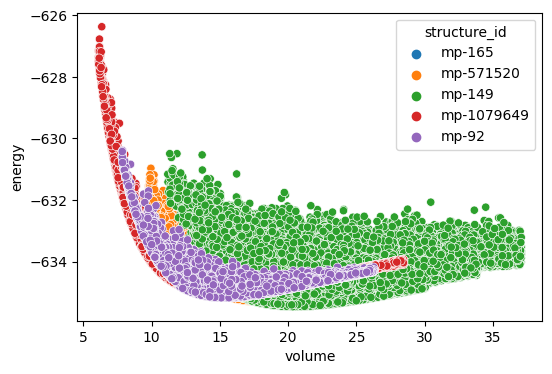

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=energy_df, x='volume', y='energy', hue='structure_id')

In [6]:
dimers = [atom for atom in mlpatoms if atom.n_atoms == 2]

In [7]:
dimer_energy = [[dimer.get_atomic_distance(), dimer.get_atomic_energy()] for dimer in dimers]
dimer_energy_df = pd.DataFrame(dimer_energy, columns=['distance', 'energy'])
dimer_energy_df.sort_values(by='distance', inplace=True)
dimer_energy_df.reset_index(drop=True, inplace=True)

Text(0.5, 1.0, 'Si dimer')

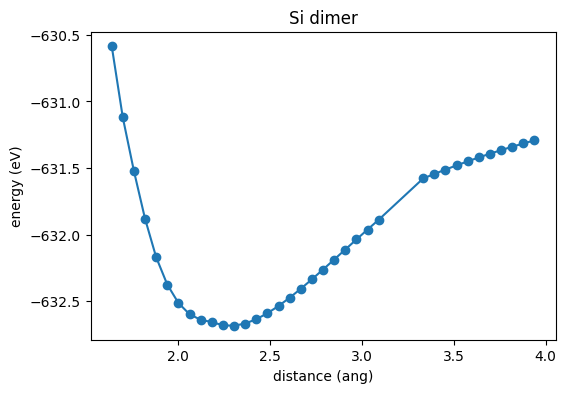

In [8]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dimer_energy_df['distance'], dimer_energy_df['energy'], marker='o')
ax.set_xlabel('distance (ang)')
ax.set_ylabel('energy (eV)')
ax.set_title('Si dimer')

In [9]:
# plot force
force_df = []
for atom in mlpatoms:
    tmp_df = pd.DataFrame(atom.force, columns=['fx', 'fy', 'fz'])
    tmp_df['structure_id'] = atom.structure_id
    force_df.append(tmp_df)

force_df = pd.concat(force_df, ignore_index=True)

<Axes: xlabel='fx', ylabel='fy'>

/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


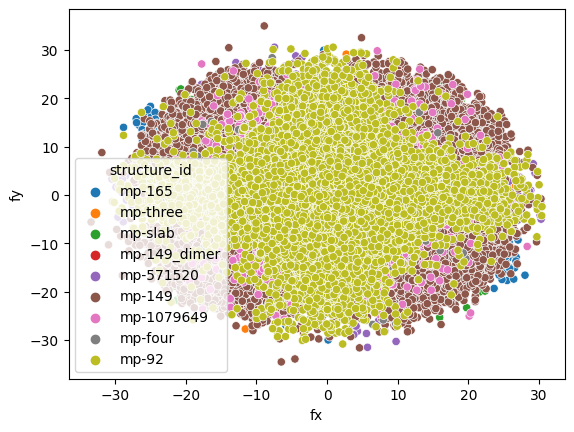

In [10]:
sns.scatterplot(data=force_df, x='fx', y='fy', hue='structure_id')